**Mfolozi Dlamini**
**March 14, 2022**

**Importing Packages**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from sklearn import datasets
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier

**Data Source & Contents**

In [3]:
#Reading in the dataset
data = pd.read_csv('/content/census_data.csv')
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


**Data Contents**

In [4]:
#Check data shape
display(data.shape)
display(data.describe())
display(data.info())

(48842, 11)

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


None

In [5]:
#Checking for Outliers
data.max()
data.min()

hours_per_week_bin         a. 0-30
occupation_bin              a. Low
msr_bin                     a. Low
capital_gl_bin              a. = 0
race_sex_bin                a. Low
education_num_bin           a. 0-8
education_bin               a. Low
workclass_bin         a. no income
age_bin                    a. 0-25
flag                          test
y                                0
dtype: object

In [6]:
#Checking for null values
data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

**Data Transformation**

In [20]:
# Data Transformation to Integer using regex functionality and flag training and test data 

copy_data = data.copy()

copy_data.replace(regex={r'[a]. ': 1, r'[b]. ': 2,r'[c]. ': 3, r'[d]. ': 4,r'[e]. ': 5}, inplace = True)
copy_data.head()
copy_data_test = copy_data[copy_data.flag == 'test']
copy_data_train = copy_data[copy_data.flag == 'train']

copy_data_train.head()
copy_data_train.tail() 

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32556,2,4,3,1,2,2,2,2,2,train,0
32557,2,2,3,1,3,2,2,2,4,train,1
32558,2,2,2,1,2,2,2,2,4,train,0
32559,1,2,1,1,3,2,2,2,1,train,0
32560,2,5,3,3,2,2,2,2,5,train,1


**1. Split the data**

In [22]:
X = copy_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin']] # features
y = copy_data['y'] #label

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**2. Finding Optimal Key Value of HyperParameter**

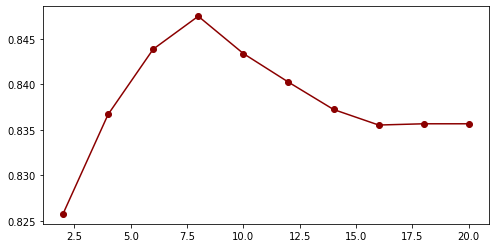

In [23]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

**3. Building a Random Forest Model**

In [25]:
#Example RF model
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [26]:
#checking accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8379171500716577


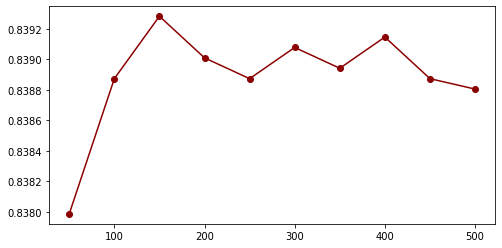

In [53]:
results = []

n_est = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# Creating Random Forest model 
for estimator in n_est:
  forest = RandomForestClassifier(n_estimators = estimator, random_state = 101)
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)
# Calculating accuracy 
  accuracy = np.mean(y_test == y_pred)
# Appending results with the accuracy values
  results.append(accuracy)

# Creating plot to visualize the accuracy for the estimators 
plt.figure(figsize=(8,4))
pd.Series(results, n_est).plot(color = "darkred", marker = "o")

**4. Building AdaBoost, Gradient Boost (classifier) and XGB Model**

In [28]:
#AdaBoost Model
adb = AdaBoostClassifier(n_estimators=100)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

#checking accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8469937896676448


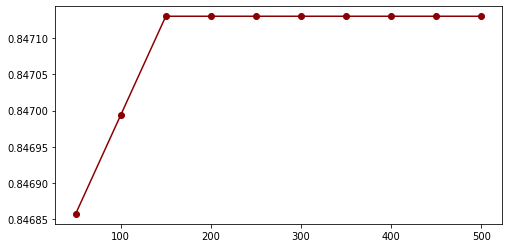

In [56]:
results = []

n_est = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# Creating Adaboost Model
for estimator in n_est:
  aboost = AdaBoostClassifier(n_estimators = estimator, random_state = 101)
  aboost.fit(X_train, y_train)
  y_pred = aboost.predict(X_test)
# Calculating accuracy 
  accuracy = np.mean(y_test == y_pred)
# Appending results with the accuracy values
  results.append(accuracy)

# Creating plot to visualize the accuracy for the estimators 
plt.figure(figsize=(8,4))
pd.Series(results, n_est).plot(color = "darkred", marker = "o")

In [57]:
#Gradient Boost

gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)

#Checking accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8491093973930253


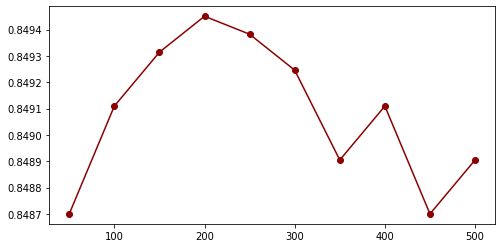

In [58]:
results = []

n_est = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# Creating gradient boost Model
for estimator in n_est:
  gboost = GradientBoostingClassifier(n_estimators = estimator, random_state = 101)
  gboost.fit(X_train, y_train)
  y_pred = gboost.predict(X_test)
# Calculating accuracy 
  accuracy = np.mean(y_test == y_pred)
# Appending results with the accuracy values
  results.append(accuracy)

# Creating plot to visualize the accuracy for the estimators 
plt.figure(figsize=(8,4))
pd.Series(results, n_est).plot(color = "darkred", marker = "o")

In [59]:
#There will be two methods of XGB
#Method 1
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3,
    'max_depth': 100}

steps = 20

model = xgb.train(param, D_train, steps)

#method 2

xg_class = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_class.fit(X_train,y_train)

preds = xg_class.predict(X_test)

print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8489046611615368


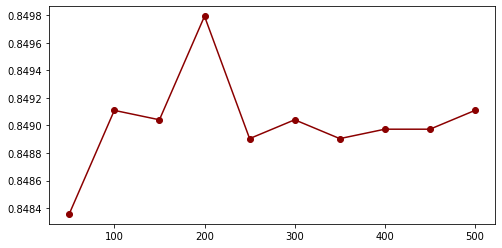

In [62]:
results = []

n_est = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# Creating xgb boost Model
for estimator in n_est:
  xboost = xgb.XGBClassifier(n_estimators = estimator, random_state = 101)
  xboost.fit(X_train, y_train)
  y_pred = xboost.predict(X_test)
# Calculating accuracy 
  accuracy = np.mean(y_test == y_pred)
# Appending results with the accuracy values
  results.append(accuracy)

# Creating plot to visualize the accuracy for the estimators 
plt.figure(figsize=(8,4))
pd.Series(results, n_est).plot(color = "darkred", marker = "o")

**Comparing Performance**

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [61]:
#changeable n_estimator parameter starts at 100
n_estimator = [100]
for trees in n_estimator:

  model1 = RandomForestClassifier(n_estimators = trees, random_state = 101) 
  model1.fit(X_train, y_train)
  y_pred1 = model1.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
  auc1 = auc(fpr, tpr)
  accuracy1 = np.mean(y_test == y_pred1)

  model2 = AdaBoostClassifier(n_estimators = trees, random_state = 101)             
  model2.fit(X_train, y_train)
  y_pred2 = model2.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred2) 
  auc2 = auc(fpr, tpr)
  accuracy2 = np.mean(y_test == y_pred2)
  
  model3 = GradientBoostingClassifier(n_estimators = trees, random_state = 101)              
  model3.fit(X_train, y_train)
  y_pred3 = model3.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
  auc3 = auc(fpr, tpr)
  accuracy3 = np.mean(y_test == y_pred3)

  model4 = xgb.XGBClassifier(n_estimators = trees, random_state = 101)                          
  model4.fit(X_train, y_train)
  y_pred4 = model4.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred4) 
  auc4 = auc(fpr, tpr)
  accuracy4 = np.mean(y_test == y_pred4)


  table = {'Random Forest': (accuracy1, auc1, trees), 
          'AdaBoost': (accuracy2, auc2, trees),
          'Gradient Boost': (accuracy3, auc3, trees),
          'XGB': (accuracy4, auc4, trees),}

  df = pd.DataFrame(table, index= ('Accuracy', 'AUC', 'Hyper-parameters'))
  display(df)

#Common hyper parameters used in models
print('Common Hyper-Parameters:')
print('n_estimator:', 100)
print('random_state:', 101)

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838873,0.846994,0.849109,0.849109
AUC,0.746241,0.747572,0.759528,0.757494
Hyper-parameters,100.000000,100.000000,100.000000,100.000000


Common Hyper-Parameters:
n_estimator: 100
random_state: 101
